#                        Statistical Thinking

importing modules

In [6]:

import pandas as pd
import math 
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
df = pd.read_csv('salary.csv')

### 1.How many responders are there? Are there any missing values in any of the variables?

In [30]:
#checking for missing values
print(df.info())
print(" ")
print('missing values', df.salary.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB
None
 
missing values 1


from the dataFrame info, there are 514 entries per columns. In salary there are 513 non-null values meaning there is one missing value.  

In [34]:
# replacing missing value with mean
df['salary']=df.salary.fillna(df.salary.mean())
df.salary.isnull().sum()

0

### 2.What is the lowest salary and highest salary in the group?

In [51]:
# lowest salary
print('Lowest Salary =', df.salary.min())
# highest salary 
print('Highest Salary =', df.salary.max())

Lowest Salary = 29000.0
Highest Salary = 96156.0


### 3.What is the mean salary for the sample? Include the standard error of the mean.

In [52]:
#mean salary for the sample
print('Mean Salary =', df.salary.mean())

Mean Salary = 50861.72745173151


In [53]:
print('Standard error of mean =', df.salary.std() / math.sqrt(514))


Standard error of mean = 558.9735910017683


### 4.What is the standard deviation for the years worked?

In [56]:
# standard deviation for yearsworked
print('standard deviation =',df.yearsworked.std())

standard deviation = 9.444695144169803


### 5.What is the median salary for the sample?

In [57]:
print('median salary =', df.salary.median())

median salary = 50096.0


### 6.What is the interquartile range for salary in the sample?

In [60]:
# naming first and second quatile variables
first_quart,sec_quart = df.salary.quantile([0.25,0.75])
# finding interquartile range
interquart_range = sec_quart - first_quart
print("The interquartile range is ", interquart_range)

The interquartile range is  20306.25


### 7.How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [27]:
male = df[df.male==1]
female = df[df.male==0]
men_tota = int(male.male.value_counts())
women_tota = int(female.male.value_counts())
data = [['men', men_tota],['women', women_tota]]
table = pd.DataFrame(data, columns = ['gender', 'total'])
print(table)

  gender  total
0    men    386
1  women    128


### 8.How many women are executives compared to men?

In [28]:
position = df[df.position==3]
womenn = position[position.male==0]
menn = position[position.male==1]
women_executives = int(womenn.male.value_counts())
men_executives = int(menn.male.value_counts())
print('women executives', women_executives)
print('men executives', men_executives)

women executives 19
men executives 192


### 9.Create a histogram for the variable Salary.

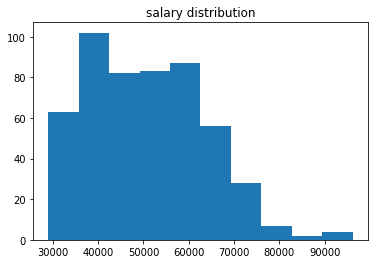

In [29]:
plt.hist(df.salary)
plt.title('salary distribution')
plt.show()

### 10.Examine the histogram and describe the distribution for Salary.

the graph is skewed to the right.

### 11.Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?

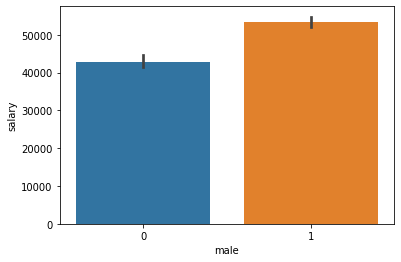

In [30]:
sns.barplot(y='salary', x='male', data=df)

plt.show()

### 12.Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).
What is the relationship between Years Worked and Salary?
Describe any patterns in the scatterplot.
Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)

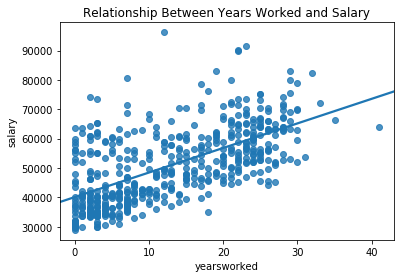

In [31]:
sns.regplot(y='salary', x='yearsworked', data=df, ci=None)
plt.title('Relationship Between Years Worked and Salary')
plt.show()

we can see that most of the values in the scatter plot liers closer to the line of regression meaning that the increase in years worked, increases the salary.

the points that liers furthers from the line of regression are know as outliers meaning that the yearsworked is not proportional to the salary.


* null Hypothesis : an increase in yearsworked is an increase in salary
* altinative hypothesis : an increase in years worked is not an increase in salary

### 13.Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.
Interpret the size and direction of the correlation statistic.
Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.

In [541]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df.salary, df.yearsworked)
print('correlation coefficient =', corr)
print('p_value =', p_value)

correlation coefficient = 0.6231354820920547
p_value = 1.274779518969558e-56


correlation is positive meaning that the years worked is directly proportinal to the salary 

P_value is less that 5 percent meaning it is statistically significant.